### Taks 1
In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.
    
- Individual Contributors(IC) - they don’t manage anyone
- Middle Managers(MM) - they are the direct bosses of IC
- Directors(D) - they are the direct bosses of MM
- VP - D direct bosses
- Executives (E) - VP direct bosses
- CEO - The direct boss of E.


### Task 2
How many people each employee manages? Consider that if John 
directly manages 2 people and these two people manage 5 people 
each, then we conclude that John manages 12 people.

### Task 3
Build a model to predict the salary of each employee.
    
### Task 4
Describe the main factors impacting employee salaries. Do you think the company has been treating all its employees fairly? 
What are the next steps you would suggest to the Head of HR?

## Data Load

In [157]:
# lib import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# data laod
employee = pd.read_csv('diversity/employee.csv')
hierarchy = pd.read_csv('diversity/company_hierarchy.csv')

employee.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience
0,138719,0,273000.0,Master,M,2
1,3192,0,301000.0,Bachelor,F,1
2,114657,0,261000.0,Master,F,2
3,29039,0,86000.0,High_School,F,4
4,118607,0,126000.0,Bachelor,F,3


In [113]:
#hierarchy['boss_id'] = hierarchy['boss_id'].apply(lambda x: int(x))
hierarchy.head()

,employee_id,boss_id,dept
0,46456,175361.0,sales
1,104708,29733.0,HR
2,120853,41991.0,sales
3,142630,171266.0,HR
4,72711,198240.0,sales


In [114]:
#missing data check
print(employee.isnull().sum(),'\n\n\n', hierarchy.isnull().sum() )

employee_id       0
signing_bonus     0
salary            0
degree_level      0
sex               0
yrs_experience    0
dtype: int64 


 employee_id    0
boss_id        1
dept           0
dtype: int64


In [115]:
#merge data
data = pd.merge(left = employee, right = hierarchy, how = 'left', on = 'employee_id')
data.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept
0,138719,0,273000.0,Master,M,2,43602.0,engineering
1,3192,0,301000.0,Bachelor,F,1,87847.0,sales
2,114657,0,261000.0,Master,F,2,180854.0,sales
3,29039,0,86000.0,High_School,F,4,88370.0,HR
4,118607,0,126000.0,Bachelor,F,3,23565.0,sales


In [116]:
hierarchy[hierarchy['boss_id'].isnull()]
#CEO has no boss

,employee_id,boss_id,dept
2427,61554,NaN,CEO


### Taks 1
In the company there are 6 levels (described below). Identify, for each employee, her corresponding level.
    
- Individual Contributors(IC) - they don’t manage anyone
- Middle Managers(MM) - they are the direct bosses of IC
- Directors(D) - they are the direct bosses of MM
- VP - D direct bosses
- Executives (E) - VP direct bosses
- CEO - The direct boss of E.

In [117]:
data.loc[data['dept'] == 'CEO', 'level'] = 'CEO'

In [118]:
levels = ['CEO', 'E', 'VP', 'D', 'MM', 'IC']

for i, level in enumerate(levels):
    
    if level == 'IC': break
    boss_ids = data.loc[data['level'] == level, 'employee_id']
    data.loc[data['boss_id'].isin(boss_ids), 'level'] = levels[i+1]
    
    

In [119]:
data.groupby('level').size().sort_values()

level
CEO       1
E         4
VP       35
D       160
MM      800
IC     9000
dtype: int64

### Task 2
How many people each employee manages? Consider that if John 
directly manages 2 people and these two people manage 5 people 
each, then we conclude that John manages 12 people.

In [120]:
data['dept'].unique()

# find the managed employees for each employee
data['counts'] = 0

for level in ['IC', 'MM', 'D', 'VP', 'E']:
    boss_ids = data[data['level'] == level]['boss_id']
    employee_ids = data[data['level'] == level]['employee_id']
    
    for b_id, e_id in zip(boss_ids, employee_ids):
        e_counts = int(1 + data.loc[data['employee_id'] == e_id, 'counts'])
        b_counts = int(data.loc[data['employee_id'] == b_id, 'counts'])
        data.loc[data['employee_id'] == b_id, 'counts'] = e_counts + b_counts

In [121]:
data[['employee_id', 'level', 'counts']].sample(30)

,employee_id,level,counts
41,15460,IC,0
844,78149,IC,0
7148,49543,IC,0
7882,1857,IC,0
2145,88152,IC,0
8207,46687,IC,0
4750,22846,IC,0
9596,24691,D,55
1089,108173,IC,0
6663,15443,IC,0


### Task 3
Build a model to predict the salary of each employee.

In [122]:
data.head()

,employee_id,signing_bonus,salary,degree_level,sex,yrs_experience,boss_id,dept,level,counts
0,138719,0,273000.0,Master,M,2,43602.0,engineering,IC,0
1,3192,0,301000.0,Bachelor,F,1,87847.0,sales,IC,0
2,114657,0,261000.0,Master,F,2,180854.0,sales,IC,0
3,29039,0,86000.0,High_School,F,4,88370.0,HR,IC,0
4,118607,0,126000.0,Bachelor,F,3,23565.0,sales,IC,0


In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 10 columns):
employee_id       10000 non-null int64
signing_bonus     10000 non-null int64
salary            10000 non-null float64
degree_level      10000 non-null object
sex               10000 non-null object
yrs_experience    10000 non-null int64
boss_id           9999 non-null float64
dept              10000 non-null object
level             10000 non-null object
counts            10000 non-null int64
dtypes: float64(2), int64(4), object(4)
memory usage: 859.4+ KB


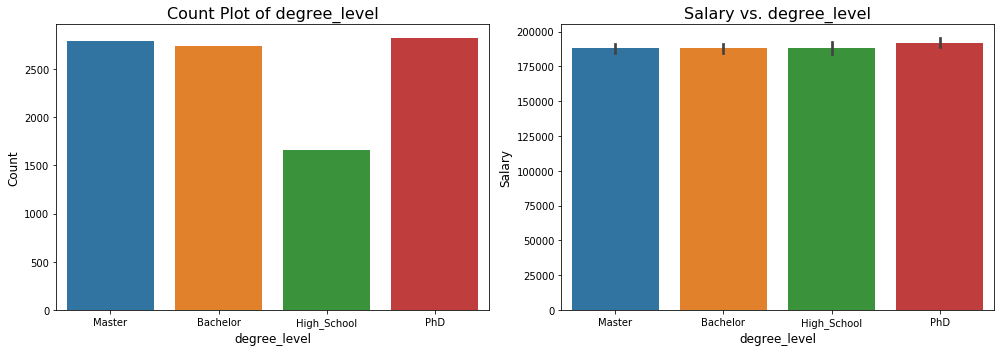

In [131]:
#degree level
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(14, 5))

sns.countplot(x='degree_level', data=data, ax=ax[0])
ax[0].set_xlabel('degree_level', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of degree_level', fontsize=16)

sns.barplot(x='degree_level', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('degree_level', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. degree_level', fontsize=16)
plt.tight_layout()
plt.show()

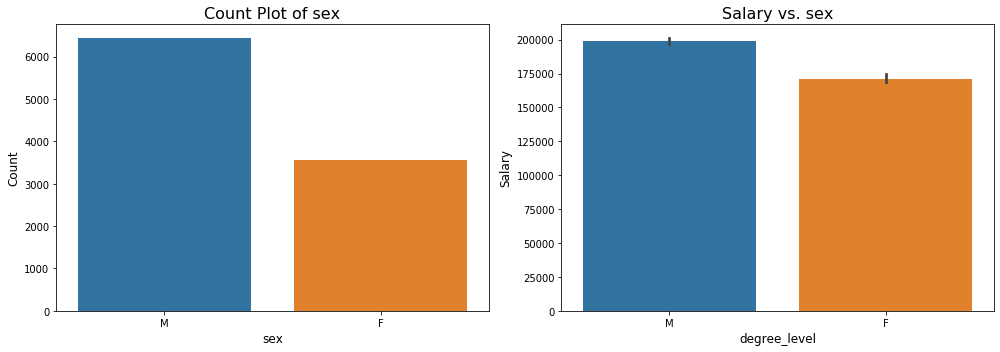

In [130]:
#sex
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(14, 5))

sns.countplot(x='sex', data=data, ax=ax[0])
ax[0].set_xlabel('sex', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of sex', fontsize=16)

sns.barplot(x='sex', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('degree_level', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. sex', fontsize=16)
plt.tight_layout()
plt.show()

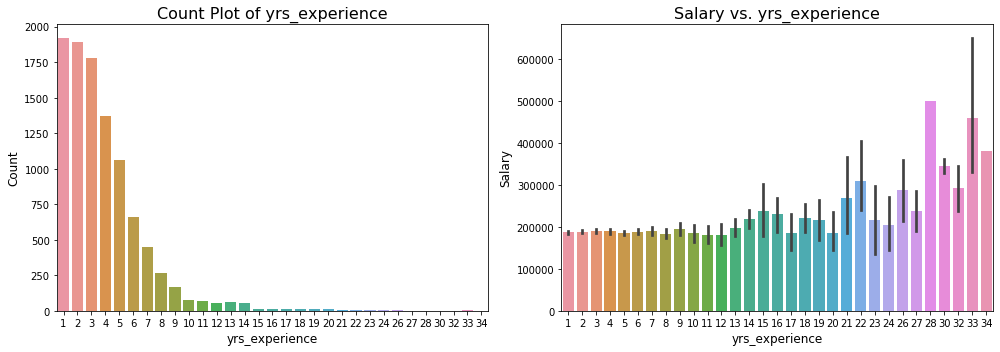

In [132]:
#yrs_experience
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(14, 5))

sns.countplot(x='yrs_experience', data=data, ax=ax[0])
ax[0].set_xlabel('yrs_experience', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of yrs_experience', fontsize=16)

sns.barplot(x='yrs_experience', y='salary', data=data, ax=ax[1])
ax[1].set_xlabel('yrs_experience', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. yrs_experience', fontsize=16)
plt.tight_layout()
plt.show()

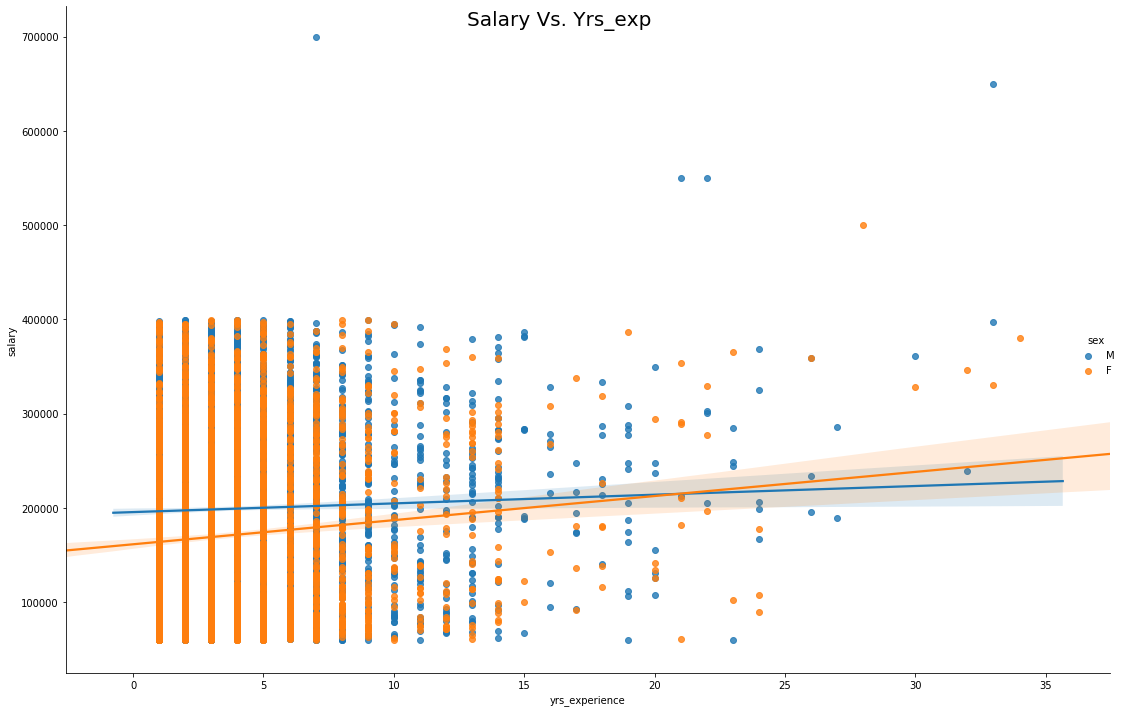

In [151]:
#experience and sex
sns.lmplot(x="yrs_experience", y="salary", hue="sex",height=10, 
           data = data, aspect = 1.5).fig.suptitle('Salary Vs. Yrs_exp',fontsize= 20)
plt.tight_layout()
plt.show()

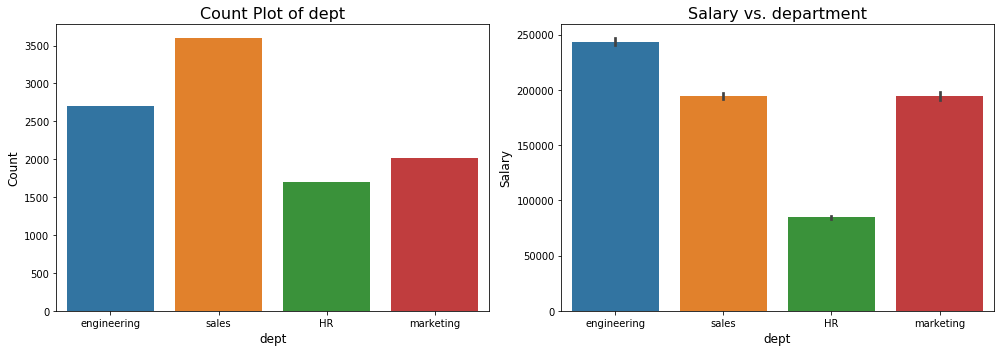

In [155]:
#dept 
fig, ax = plt.subplots(nrows = 1, ncols =2, figsize=(14, 5))

sns.countplot(x='dept', data=data[data['dept'] != 'CEO'], ax=ax[0])
ax[0].set_xlabel('dept', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].set_title('Count Plot of dept', fontsize=16)

sns.barplot(x='dept', y='salary', data=data[data['dept'] != 'CEO'], ax=ax[1])
ax[1].set_xlabel('dept', fontsize=12)
ax[1].set_ylabel('Salary', fontsize=12)
ax[1].set_title('Salary vs. department', fontsize=16)
plt.tight_layout()
plt.show()

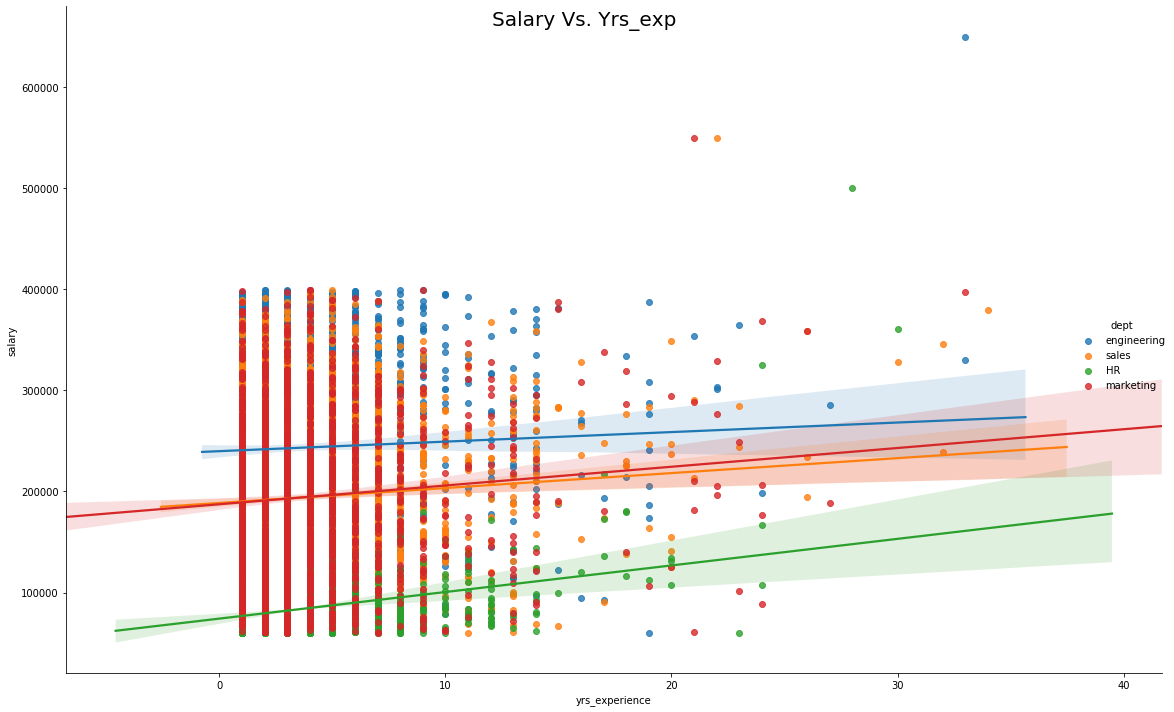

In [153]:
#dept and yrs_exp
sns.lmplot(x="yrs_experience", y="salary", hue="dept",height=10, 
           data = data[data['dept'] != 'CEO'], aspect = 1.5).fig.suptitle('Salary Vs. Yrs_exp',fontsize= 20)
plt.tight_layout()
plt.show()

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(4684)

data = data[data['dept'] != 'CEO']
data_dummy = data.drop(columns = ['level'])
data_dummy = pd.get_dummies(data_dummy)  

list(data_dummy.columns)

['employee_id',
 'signing_bonus',
 'salary',
 'yrs_experience',
 'boss_id',
 'counts',
 'degree_level_Bachelor',
 'degree_level_High_School',
 'degree_level_Master',
 'degree_level_PhD',
 'sex_F',
 'sex_M',
 'dept_HR',
 'dept_engineering',
 'dept_marketing',
 'dept_sales']

In [105]:
data_dummy = data_dummy.drop(columns =['employee_id', 'boss_id'])
list(data_dummy.columns)

train, test = train_test_split(data_dummy, test_size = 0.20)
rf_mdl = RandomForestRegressor(n_estimators=1000, max_depth = 10, oob_score = True)

In [111]:
rf_mdl.fit(train.drop(columns = ['salary']),train['salary'])
print('oob socre:\t', rf_mdl.oob_score_, '\ntest score:\t',rf_mdl.score(
    test.drop(columns = ['salary']), test['salary']))

oob socre:	 0.3324136302996332 
test score:	 0.3287412181111774


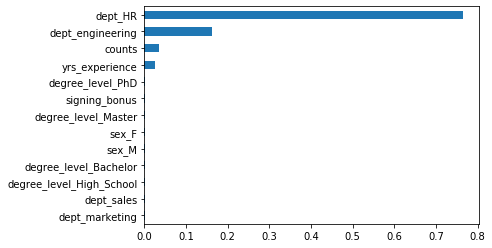

In [102]:
feat_importances = pd.Series(rf_mdl.feature_importances_, index=train.drop('salary', axis=1).columns)
feat_importances.sort_values().plot(kind='barh')
plt.show()

### Task 4
Describe the main factors impacting employee salaries. Do you think the company has been treating all its employees fairly? 
What are the next steps you would suggest to the Head of HR?